Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [2]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [4]:
def sigmoid(x):
    y = 1/ (1 + np.exp(-x))
    return y

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [5]:
#Your linear model from HW2
def model(x,w): 
    y_predicted = w[0]+np.dot(x.T,w[1:]).T
    return y_predicted
#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
    a = sigmoid(model(x,w))
    cost = 0
    cost -= np.sum((y * np.log(a))+((1-y)*np.log(1-a)))
    return cost/y.size

Q3) [2 points] Run the code below to read a data file. Plot a scatter plot of x vs y.

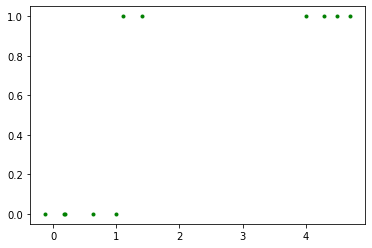

array([[0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [5]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = np.array(data[:-1,:])
y = np.array(data[-1:,:])  
plt.plot(x, y, '.', color='green')
plt.show()

Q4) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [7]:
##gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = grad(g) 
    weight_history = []
    cost_history = []
    weight = w
    for i in range(0,max_its+1):
        weight_history.append(weight)
        gw = g(weight,x,y)
        cost_history.append(gw)
        weight = weight - alpha * gradient(weight,x,y)
    return weight_history,cost_history

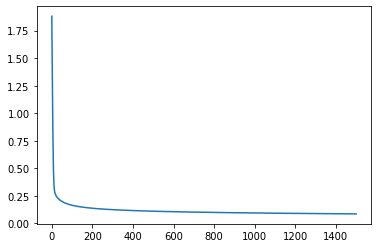

In [8]:
##Call the gradient_descent function here
w = np.array([3.0,3.0])
max_its = 1500
alpha = 1
weight_history = gradient_descent(cross_entropy, alpha, max_its, w, x, y)[0]
cost_history = gradient_descent(cross_entropy, alpha, max_its, w, x, y)[1]
learned_w = weight_history[1500]
##Plot the cost history here
plt.plot(cost_history)
plt.show()

Q5) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [9]:
def logistic_regression(learned_w,x):
    positive_class_prob = sigmoid(learned_w[0]+learned_w[1]*x)
    return positive_class_prob

Q6) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3. 


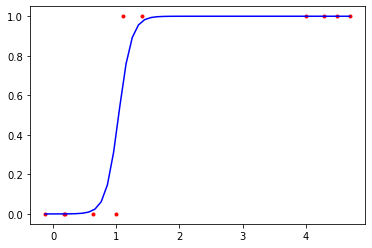

In [10]:
%matplotlib inline
s = np.linspace(np.min(x),np.max(x))
y_est = []
for i in range(len(s)):
    y_est.append(logistic_regression(learned_w,s[i]))
y_est = np.array(y_est)
plt.plot(x, y, '.', color='red')
plt.plot(s, y_est, '-',color='blue')
plt.show()

Q7) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [11]:
def logistic_regression_modified(learned_w,x, threshold):
    class_label = sigmoid(model(x,learned_w))
    for i in range(0,len(class_label)):
        if class_label[i] > threshold:
            class_label[i] = 1
        else:
            class_label[i] = 0
    return class_label

Q8) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [12]:
def evaluate(y_actual,y_pred):
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0
    for i in range(len(y_actual)):
        if y_actual[i] == 1 and y_pred[i] == 1:
            true_positive += 1
        if y_actual[i] == 0 and y_pred[i] == 1:
            false_positive += 1
        if y_actual[i] == 1 and y_pred[i] == 0:
            false_negative += 1
        if y_actual[i] == 0 and y_pred[i] == 0:
            true_negative += 1
    accuracy = (true_positive + true_negative)/len(y_actual)
    return false_positive, false_negative, true_positive, true_negative, accuracy
y_pred = logistic_regression_modified(learned_w,x, 0.5)
result = evaluate(y[0],y_pred)
print(f'The false positive is {result[0]}')
print(f'The false negative is {result[1]}')
print(f'The true positive is {result[2]}')
print(f'The true negative is {result[3]}')
print(f'The accuracy rate is {result[4]*100}%')

The false positive is 0
The false negative is 0
The true positive is 6
The true negative is 5
The accuracy rate is 100.0%


Q9) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [13]:
def perceptron_cost(w,x,y):    
    cost = np.sum(np.log(1+np.exp(-y * model(x,w))))/len(y[0])
    return cost

Q10) [10 points] Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=10. Save the cost and weight history returned by the gradient descent function. Plot the cost history. Which cost seems to do better on this dataset? Why do think that is?


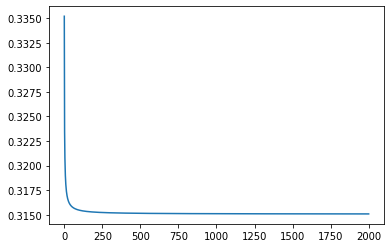

In [14]:
##Call the gradient_descent function here
w = np.array([1.0,1.0])
max_its = 2000
alpha = 10
cost_history = gradient_descent(perceptron_cost, alpha, max_its, w, x, y)[1]
##Plot the cost history here
plt.plot(cost_history)
plt.show()

From the looking at the performance of the cost history, the cross entropy loss would be better. It converges faster than perceptron cost when using the same alpha and initial weight

## The rest of these problems are for bonus points

Q11) [2 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [81]:
import autograd.numpy as np 
import pandas as pd
weather_data = pd.read_csv('heart.csv')
weather_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Q12) [2 points] Use the data above to set y to be the "target" and X to be the remaining columns.

In [ ]:
y = weather_data["target"]
x = weather_data.drop(['target'],1)

Q13) [2 points] Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
x.train, x.test, y.train, y.test = train_test_split(x,y,test_size=0.20, random_state=42)

Q14) [5 points] Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
clf = LogisticRegression(random_state=0).fit(x.train, y.train)

Q15) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [77]:
y.pred = clf.predict_proba(x.test)

Q16) [2 points] Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [78]:
y.pred_filter = []
for i in y.pred:
   y.pred_filter.append(i[1])
print(y.pred_filter)

[0.11238666179190718, 0.7526018150568001, 0.8175943022398557, 0.02941700939728005, 0.9260294921653689, 0.9066137032589731, 0.6025025152240602, 0.001426978949490069, 0.0054307904199966854, 0.5131522320165958, 0.7893010987833501, 0.06552924068681384, 0.9240964681665204, 0.02190855077181235, 0.9834214557524653, 0.9489912754672223, 0.9802422390317034, 0.05534584954016422, 0.007368423022639683, 0.011194528177346511, 0.6988546711273771, 0.00930720279685918, 0.13099230643422413, 0.8238126225543095, 0.9231877739878831, 0.6879309514034907, 0.8903355768811628, 0.6757781424936781, 0.007646903546176788, 0.9132831705475116, 0.04085353803009077, 0.03117496158670286, 0.006184884716064725, 0.07409926206482352, 0.6756555868754249, 0.06994694141196173, 0.6229629741968907, 0.8818220255083041, 0.8036055726063113, 0.8524974050945436, 0.5702159839557437, 0.8263458096293466, 0.7992979961162763, 0.6766784806172899, 0.8420262707300592, 0.006561662921053354, 0.7991518680850258, 0.9528540828246557, 0.08607690730

Q17) [8 points] Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y.test, y.pred_filter, pos_label=1)
print(thresholds)
RocCurveDisplay.from_predictions(y_test, y.pred_filter)
plt.show()

Q18) [2 points] Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [80]:
##Your code here
from sklearn.metrics import roc_auc_score
roc_auc_score(y.test, y.pred_filter)

0.9224137931034483